# Stock Prices Prediction with LSTM

<img src="stock1.png">

# Introduction to Recurrent Neural Network

Recurrent Neural Network(RNN) are a type of Neural Network where the output from previous step are fed as input to the 
current step.In traditional neural networks, all the inputs and outputs are independent of each other,
but in cases like when it is required to predict the next word of a sentence, the previous words are required 
and hence there is a need to remember the previous words. Thus RNN came into existence, which solved this issue
with the help of a Hidden Layer. The main and most important feature of RNN is Hidden state, which remembers some 
information about a sequence.

<img src="RNN1.png">

RNN models are mostly used in the fields of natural language processing and speech recognition. 
RNN remembers things for just small durations of time, i.e. if we need the information after a small time it may be reproducible, but once a lot of words are fed in, this information gets lost somewhere. This issue can be resolved by applying a slightly tweaked version of RNNs – the Long Short-Term Memory Networks.


# Long Short-Term Memory (LSTM)

LSTMs make small modifications to the information by multiplications and additions. 
With LSTMs,the information flows through a mechanism known as cell states.
This way, LSTMs can selectively remember or forget things. 
The information at a particular cell state has three different dependencies.

1>The Forget Gate (This gate is sorting out the relevant and irrelevant information and pushing forward, only the relevant information towards the cell state ( ht-1 + xt) is forwarded to forget gate where ht-1 is the previous hidden state and xt is current input, the addition of both is processed under sigmoid function which will convert the output value in the range 0 to 1

2>The Input Gate (The input gate decides what information is relevant to add from the current step)

3> The Output Gate (it helps in deciding which outputs we will use, and after applying this, we provide the resultant matrix to softmax to calculate the probabilities, deciding who is the winner candidate for the prediction.)

<img src="lstm-1.png">

In [14]:
from IPython.display import HTML
HTML('<img src="LSTM.gif">')

# Part 1 - Data Preprocessing


In [15]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
# Importing the training set
dataset_train = pd.read_csv('SBE-BANK.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [17]:
dataset_train.head(2)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.2,233.5,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.1,233.8,233.25,5082859,11859.95


In [18]:
# Feature Scalling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [19]:
# Creating a data structure with 60 timesteps and 1 output
#A time step is a single occurrence of the cell -
# e.g. on the first time step you produce output1, h0, on the second time step you produce output2 and so on
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [20]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [21]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [22]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [23]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [24]:

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [25]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))


In [26]:
# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 2, batch_size = 32)



Epoch 1/2
62/62 [==============================] - 4s 70ms/step - loss: 0.0099
Epoch 2/2
62/62 [==============================] - 4s 72ms/step - loss: 0.0031


In [30]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('SBE-test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [28]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


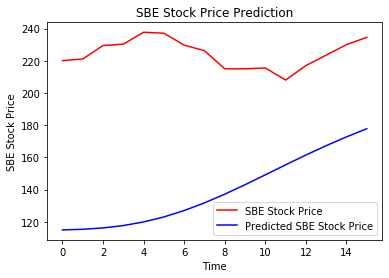

In [29]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'SBE Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted SBE Stock Price')
plt.title('SBE Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('SBE Stock Price')
plt.legend()
plt.show()